<a href="https://colab.research.google.com/github/DaniilAszn/Python_course/blob/main/Python_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

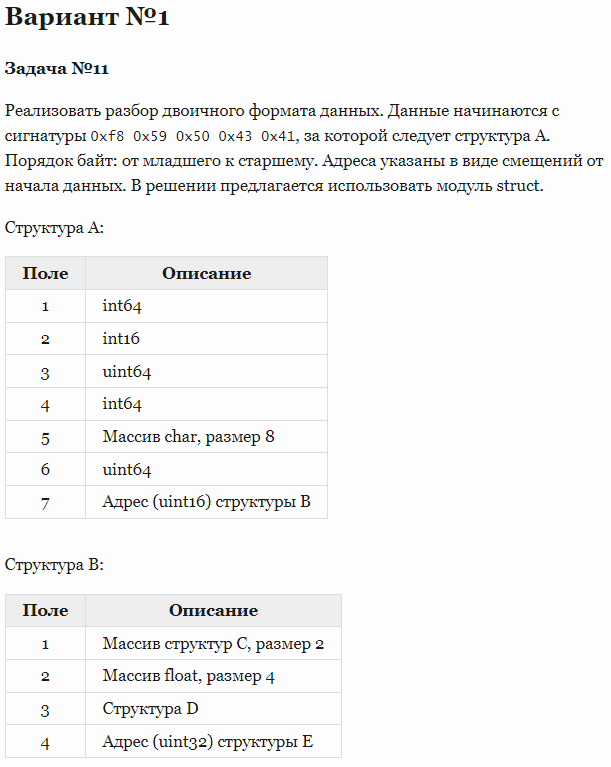

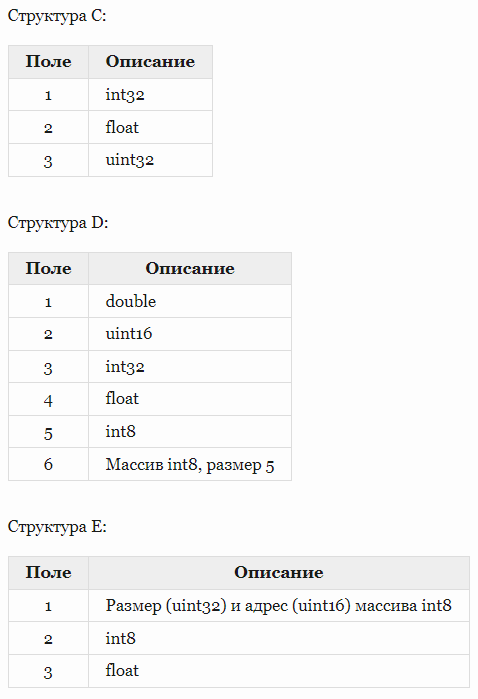

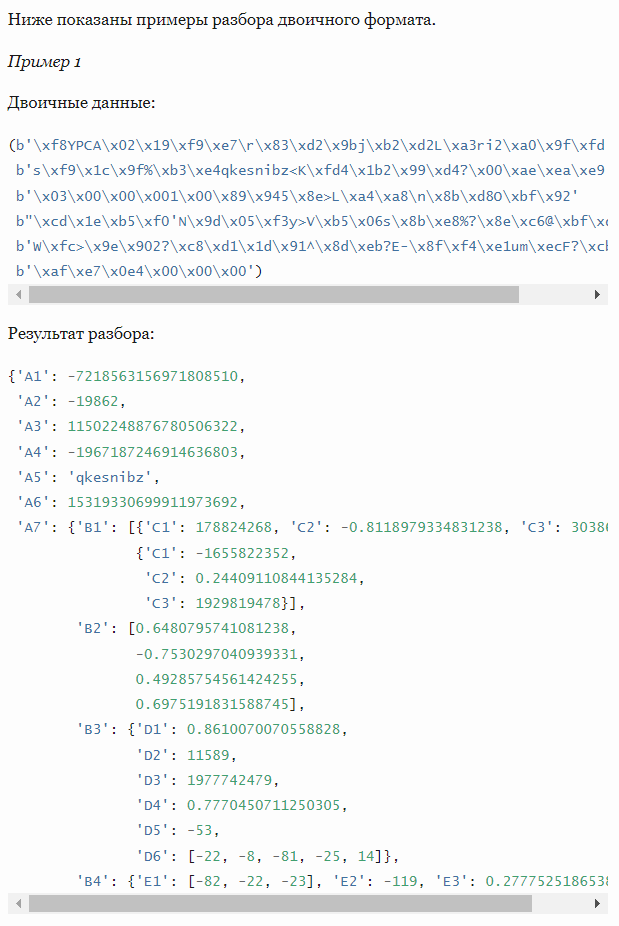

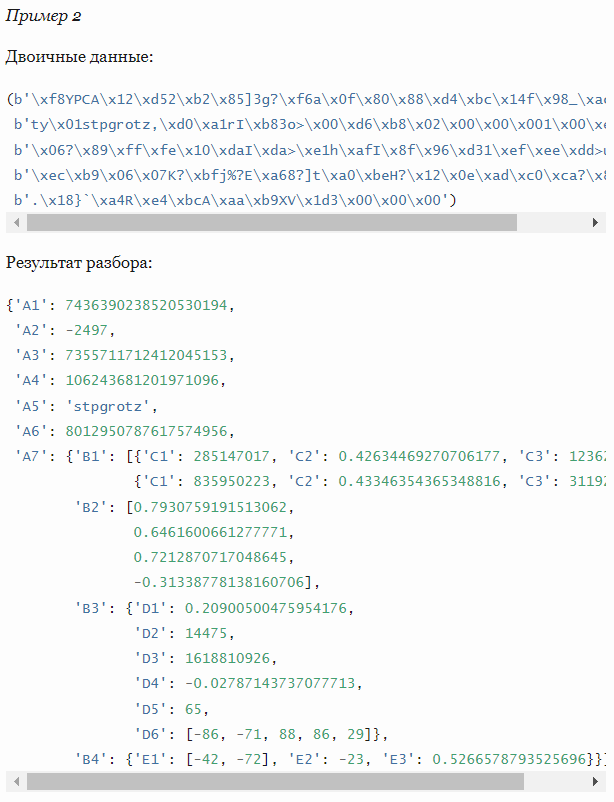

In [ ]:
from struct import *

dictionary = dict(
    float='f',
    double='d',
    char='c',
    int8='b',
    uint8='B',
    int16='h',
    uint16='H',
    int32='i',
    uint32='I',
    int64='q',
    uint64='Q'
)


def parse(buffer, offset, type, order='<', _caller=None):
    pattern = dictionary[type]
    size = calcsize(pattern)
    value = unpack_from(order + pattern, buffer, offset)[0]
    return value, offset + size


def parse_a(buffer, offset):
    a1, offset = parse(buffer, offset, 'int64', _caller=parse_a)
    a2, offset = parse(buffer, offset, 'int16', _caller=parse_a)
    a3, offset = parse(buffer, offset, 'uint64', _caller=parse_a)
    a4, offset = parse(buffer, offset, 'int64', _caller=parse_a)
    a5 = ''
    for _ in range(8):
        value, offset = parse(buffer, offset, 'char', _caller=parse_a)
        a5 += value.decode()
    a6, offset = parse(buffer, offset, 'uint64', _caller=parse_a)
    offset_b, offset = parse(buffer, offset, 'uint16', _caller=parse_a)
    a7, _ = parse_b(buffer, offset_b)
    return dict(A1=a1, A2=a2, A3=a3, A4=a4, A5=a5, A6=a6, A7=a7), offset


def parse_b(buffer, offset):
    b1 = []
    for _ in range(2):
        value, offset = parse_c(buffer, offset)
        b1.append(value)
    b2 = []
    for _ in range(4):
        value, offset = parse(buffer, offset, 'float', _caller=parse_d)
        b2.append(value)
    b3, offset = parse_d(buffer, offset)
    offset_e, offset = parse(buffer, offset, 'uint32', _caller=parse_b)
    b4, _ = parse_e(buffer, offset_e)
    return dict(B1=b1, B2=b2, B3=b3, B4=b4), offset


def parse_c(buffer, offset):
    c1, offset = parse(buffer, offset, 'int32', _caller=parse_c)
    c2, offset = parse(buffer, offset, 'float', _caller=parse_c)
    c3, offset = parse(buffer, offset, 'uint32', _caller=parse_c)
    return dict(C1=c1, C2=c2, C3=c3), offset


def parse_d(buffer, offset):
    d1, offset = parse(buffer, offset, 'double', _caller=parse_d)
    d2, offset = parse(buffer, offset, 'uint16', _caller=parse_d)
    d3, offset = parse(buffer, offset, 'int32', _caller=parse_d)
    d4, offset = parse(buffer, offset, 'float', _caller=parse_d)
    d5, offset = parse(buffer, offset, 'int8', _caller=parse_d)
    d6 = []
    for _ in range(5):
        value, offset = parse(buffer, offset, 'int8', _caller=parse_d)
        d6.append(value)
    return dict(D1=d1, D2=d2, D3=d3, D4=d4, D5=d5, D6=d6), offset


def parse_e(buffer, offset):
    size_e1, offset = parse(buffer, offset, 'uint32', _caller=parse_e)
    offset_e1, offset = parse(buffer, offset, 'uint16', _caller=parse_e)
    e1 = []
    for _ in range(size_e1):
        value, offset_e1 = parse(buffer, offset_e1, 'int8', _caller=parse_e)
        e1.append(value)
    e2, offset = parse(buffer, offset, 'int8', _caller=parse_e)
    e3, offset = parse(buffer, offset, 'float', _caller=parse_e)
    return dict(E1=e1, E2=e2, E3=e3), offset


def main(data):
    return parse_a(data, 5)[0]


# print(main(b'\xf8YPCA\x02\x19\xf9\xe7\r\x83\xd2\x9bj\xb2\xd2L\xa3ri2\xa0\x9f\xfd'
#            b's\xf9\x1c\x9f%\xb3\xe4qkesnibz<K\xfd4\x1b2\x99\xd4?\x00\xae\xea\xe9'
#            b'\x03\x00\x00\x001\x00\x89\x945\x8e>L\xa4\xa8\n\x8b\xd8O\xbf\x92'
#            b"\xcd\x1e\xb5\xf0'N\x9d\x05\xf3y>V\xb5\x06s\x8b\xe8%?\x8e\xc6@\xbf\xd3"
#            b'W\xfc>\x9e\x902?\xc8\xd1\x1d\x91^\x8d\xeb?E-\x8f\xf4\xe1um\xecF?\xcb\xea\xf8'
#            b'\xaf\xe7\x0e4\x00\x00\x00'))
#
# print(main(b'\xf8YPCA\x12\xd52\xb2\x85]3g?\xf6a\x0f\x80\x88\xd4\xbc\x14f\x98_\xac\xad\x10'
#            b'ty\x01stpgrotz,\xd0\xa1rI\xb83o>\x00\xd6\xb8\x02\x00\x00\x001\x00\xe9\r\xd3'
#            b'\x06?\x89\xff\xfe\x10\xdaI\xda>\xe1h\xafI\x8f\x96\xd31\xef\xee\xdd>u\x80'
#            b'\xec\xb9\x06\x07K?\xbfj%?E\xa68?]t\xa0\xbeH?\x12\x0e\xad\xc0\xca?\x8b8'
#            b'.\x18}`\xa4R\xe4\xbcA\xaa\xb9XV\x1d3\x00\x00\x00'))